In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import seaborn as sns
import string
import pandas as pd


# Import and Organize Data

## Import data 

In [ ]:
fpath_d = '../../Extremes/DPS_MEF'
fpath_u = '../../Extremes/Uncontrolled'

projections = np.unique([f.split("_")[0] for f in os.listdir(fpath_d) if 'csv' in f])

DPS = dict.fromkeys(projections)
UC = dict.fromkeys(projections)

In [ ]:
import pandas as pd
fpath_histu = '../../../Historical/Extremes'

HUC_ams = pd.read_csv(os.path.join(fpath_histu, 'Uncontrolled_AMS.csv'))
HUC_7qs = pd.read_csv(os.path.join(fpath_histu, 'UC_7Q.csv'))



In [ ]:
projections = np.unique([f.split("_")[0] for f in os.listdir(fpath_d) if 'csv' in f])

for proj in projections:
    DPS[proj] = pd.read_csv(os.path.join(fpath_d,'%s_DailyFlows.csv' % proj), parse_dates=True, index_col = 'date')
    UC[proj] = pd.read_csv(os.path.join(fpath_u,'%s_DailyFlows.csv' % proj), parse_dates=True, index_col = 'date')

In [ ]:
# df = DPS[proj]['P72']

# for  proj in projections:
#     fig, ax = plt.subplots()

#     for year in range(2040,2070):
#         df_temp = df[df.index.year == year]
#         ax.plot(df_temp.values)
#         ax.set_title(proj)

#     plt.show()

In [ ]:
ROBUST_POLICY_TITLES = {
    'P86': 'Best Low Flow Policy',
    'P72': 'Best High Flow Policy',
    'P41': 'Compromise Policy',
    'PUC': 'Projected Uncontrolled'
}

## Get Density

In [ ]:
def getProbs(data, ymin, ymax):
    probMatrix = np.zeros([366,365])
    unscaledMatrix = np.zeros([48*30,365])
    step = (ymax - ymin) / 366
    # for i in range(1,366):
        # values = data[i]
        # x = np.sort(values)
        # y = np.arange(len(x))/float(len(x))
        # probMatrix[:,i] = y
        # unscaledMatrix[:,i] = x
    for i in range(np.shape(probMatrix)[0]):

        for v in range(np.shape(probMatrix)[1]):
            # print(ymax-step*i, ymax-step*(i+1), [f for f in data[v+1] if (f < ymax-step*i) & (f <= ymax=)])
            count = ((np.array(data[v+1]) < ymax-step*i) & (np.array(data[v+1]) >= ymax-step*(i+1))).sum()
            # probMatrix[i,v] = count/100000.0
            probMatrix[i,v] = count/ (48 * 30)
    return probMatrix,unscaledMatrix


def CC_Vals(dict_name, col):
    for key in dict_name:
        dict_name[key]['doy'] = dict_name[key].index.dayofyear
        dict_name[key] = dict_name[key][(dict_name[key].index.year >= 2040) & (dict_name[key].index.year <=2069)]
    
    doy_dict = dict.fromkeys(range(1,366))
    
    for key in doy_dict:
        doy_dict[key] = []
        
    for key in dict_name:
        for i in range(1,366):
            df = dict_name[key][dict_name[key].doy == i]
            val = df[col].tolist()
            doy_dict[i].extend(val)
            
    cdf, flows = getProbs(doy_dict, 0, 12100.0)
    
    return cdf, flows

In [ ]:
uc_cdf, uc_flows = CC_Vals(UC, 'PUC')
p86_cdf, p86_flows = CC_Vals(DPS, 'P86')
p47_cdf, p47_flows = CC_Vals(DPS, 'P47')
p41_cdf, p41_flows = CC_Vals(DPS, 'P41')
p00_cdf, p00_flows = CC_Vals(DPS, 'P00')


In [ ]:
p72_cdf, p47_flows = CC_Vals(DPS, 'P72')
p58_cdf, p41_flows = CC_Vals(DPS, 'P58')
p68_cdf, p00_flows = CC_Vals(DPS, 'P68')


In [ ]:
UC_Historical = pd.read_csv('../../../Historical/Timeseries/Uncontrolled/Historical_00_Flow.csv', parse_dates=True, index_col = 'date')
UC_Historical['doy'] = UC_Historical.index.dayofyear

UC_Hist_DOY = dict.fromkeys(range(1,366))

for key in UC_Hist_DOY:
    UC_Hist_DOY[key] = []


for i in range(1,366):
    df = UC_Historical[UC_Historical.doy == i]
    val = df['flow'].tolist()
    UC_Hist_DOY[i].extend(val)
    

probMatrix = np.zeros([30,365])
unscaledMatrix = np.zeros([30,365])

for i in range(1,365):
    values = UC_Hist_DOY[i]
    x = np.sort(values)
    y = np.arange(len(x))/float(len(x))
    probMatrix[:,i] = y
    unscaledMatrix[:,i] = x

    
uc_hist = unscaledMatrix.transpose()
cdf_hist = probMatrix.transpose()

In [ ]:
from matplotlib import colors
from matplotlib import cm as cmx

In [ ]:
jet = plt.get_cmap('RdYlBu_r')
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
scalarMap.to_rgba(0)

# Plot Flows - Probability

## PMF

In [ ]:
items = [np.log10(uc_cdf), np.log10(p41_cdf), np.log10(p86_cdf), np.log10(p72_cdf)]
# items = [uc_cdf, p14_cdf, p92_cdf, p07_cdf, p41_cdf]
j = 0
for item in items:
    a = item[item > -np.inf]
    if j == 0:
        tickMin = np.min(a)
        tickMax = np.max(a)
    else: 
        tickMin = min(np.min(a), np.min(tickMin))
        tickMax = max(np.max(a), np.max(tickMax))
        
    j+= 1

In [ ]:
print(tickMin, tickMax)

In [ ]:
# items = [np.log10(uc_cdf), np.log10(p92_cdf), np.log10(p07_cdf),  np.log10(p14_cdf), np.log10(p41_cdf)]
# items = [uc_cdf, p92_cdf, p07_cdf, p14_cdf, p41_cdf]
titles = ['Projected Uncontrolled', 'Compromise Policy', 'Best Low Flow Policy', 'Best High Flow Policy', 'Placeholder']

ncols = 2 # 1st column = best flood soln, 2nd column = best hydro soln, 3rd column = compromise
nrows = 2 # 1st row = WC formulation, 2nd row = WP1 formulation
# titles = ["Uncontrolled", "Most Robust 7QS Policy", "Most Robust AMS Policy", "Most Robust AMS_ENV Policy", "Most Robust Policy for AMS and 7QS"]
sns.set()
fig = plt.figure()
for i in range(nrows):
    for j in range(ncols):
        ax = fig.add_subplot(nrows,ncols,ncols * i + j + 1)
        sm = ax.imshow(items[ncols * i + j], cmap='RdYlBu_r',origin="upper", aspect='auto',norm=mpl.colors.Normalize(vmin=tickMin, vmax=tickMax))


        ax.set_xticks([45,137,229,319])
    #     if i == 0:
    #         ax.tick_params(axis='x',which='both',labelbottom='off')
    #         # ax.set_title(titles[j],fontsize=16)
    #     else:
        ax.set_xticklabels(['Mar','Jun','Sep','Dec'],fontsize=14)

        #ax.set_yticks(np.arange(0,366+366/3,366/3))
        #ax.set_yticklabels(np.arange(ymax,ymin-5,-5),fontsize=16)
        #ax.set_ylabel(ylabels[i],fontsize=16)



        ax.set_ylim(366,244)
        hist_min = ax.plot((1-uc_hist[:,0]/12100)*(366), color="black", linewidth = 2, label = "HUC Max/Min") # first alarm
        hist_max = ax.plot((1-uc_hist[:,29]/12100)*(366), color="black", linewidth = 2) # first alarm
        hist_med = ax.plot((1-uc_hist[:,14]/12100)*(366), color="black", linewidth = 2, linestyle='dotted', label="HUC Median") # first alarm

        ax.set_yticks(np.arange(245,366+ 245/8,245/8))
        # print(np.arange(12100/2,0-12100/4,-12100/4))
        if (ncols * i + j) % 2 == 0:
            ax.set_yticklabels(np.arange(4000, 0-1000,-1000),fontsize=14)
            ax.set_ylabel("Flow (cms)", fontsize=14)
        else:
            ax.set_yticklabels("")

        ax.text(0.005, 0.85, "("+ string.ascii_lowercase[ncols * i + j] + ")", transform=ax.transAxes, 
            size=13, weight='bold')
        ax.set_title(titles[ncols * i + j], fontsize=14)
      
            #ax.legend(bbox_to_anchor=(0.8, 1))

#     alarm2, = ax.plot([0,365],[(1-11.25/15.0)*365.0,(1-11.25/15.0)*365.0],linestyle='--',c='k') # second alarm
#     dikeHeight, = ax.plot([0,365],[(1-13.4/15.0)*365.0,(1-13.4/15.0)*365.0],linewidth=2,c='k') # dike height

fig.subplots_adjust(right=0.8,bottom=0.2)
# fig.text(0.04, 0.5, r'$z^{HN} (m)$', va='center', rotation='vertical',fontsize=18)
#fig.legend([alarm1, alarm2, dikeHeight],['First Alarm', 'Second Alarm', 'Dike Height'], \
#loc='lower center', ncol=3, frameon=True)
# cbar_ax = fig.add_axes([1,0.4, 0.05, 0.3])
cbar_ax = fig.add_axes([1.05, 0.3, 0.05, 0.4])
cbar = fig.colorbar(sm, cax = cbar_ax, orientation='vertical', ticks=np.arange(-3,0,1)) # cax=cbar_ax ticks=np.arange(-4,0,1), 
cbar.ax.set_yticklabels([r'$0.1$',r'$1.0$',r'$10$'],fontsize=14)
cbar.ax.set_ylabel('% of Years',fontsize=14) #, rotation=0 )
fig.set_size_inches([6.3625, 6.3625])
fig.tight_layout()
fig.savefig('Figures/PMF.svg', bbox_inches='tight')
fig.savefig('Figures/PMF.png', bbox_inches='tight')

plt.show()


# Late Century

In [45]:
def CC_Vals(dict_name, col):
    for key in dict_name:
        dict_name[key]['doy'] = dict_name[key].index.dayofyear
        dict_name[key] = dict_name[key][(dict_name[key].index.year >= 2070)]
    
    doy_dict = dict.fromkeys(range(1,366))
    
    for key in doy_dict:
        doy_dict[key] = []
        
    for key in dict_name:
        for i in range(1,366):
            df = dict_name[key][dict_name[key].doy == i]
            val = df[col].tolist()
            doy_dict[i].extend(val)
            
    cdf, flows = getProbs(doy_dict, 0, 12100.0)
    
    return cdf, flows

In [13]:
uc_cdf, uc_flows = CC_Vals(UC, 'PUC')
p14_cdf, p14_flows = CC_Vals(DPS, 'P14')
p92_cdf, p92_flows = CC_Vals(DPS, 'P92')
p07_cdf, p07_flows = CC_Vals(DPS, 'P07')
p41_cdf, p41_flows = CC_Vals(DPS, 'P41')

In [14]:
items = [np.log10(uc_cdf), np.log10(p14_cdf), np.log10(p92_cdf), np.log10(p07_cdf), np.log10(p41_cdf)]
# items = [uc_cdf, p14_cdf, p92_cdf, p07_cdf, p41_cdf]
j = 0
for item in items:
    a = item[item > -np.inf]
    if j == 0:
        tickMin = np.min(a)
        tickMax = np.max(a)
    else: 
        tickMin = min(np.min(a), np.min(tickMin))
        tickMax = max(np.max(a), np.max(tickMax))
        
    j+= 1

<ipython-input-14-df80220e9e62>:1: RuntimeWarning: divide by zero encountered in log10
  items = [np.log10(uc_cdf), np.log10(p14_cdf), np.log10(p92_cdf), np.log10(p07_cdf), np.log10(p41_cdf)]


<ipython-input-15-807a8799a99c>:1: RuntimeWarning: divide by zero encountered in log10
  items = [np.log10(uc_cdf), np.log10(p92_cdf), np.log10(p07_cdf),  np.log10(p14_cdf), np.log10(p41_cdf)]
<ipython-input-15-807a8799a99c>:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


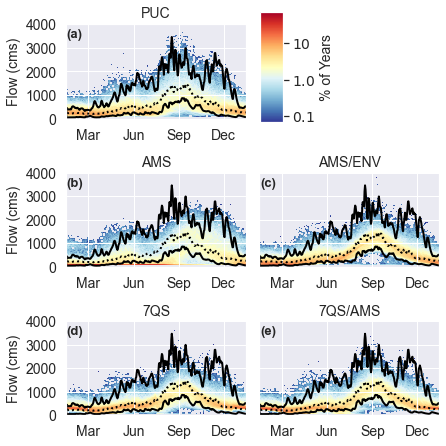

In [15]:
items = [np.log10(uc_cdf), np.log10(p92_cdf), np.log10(p07_cdf),  np.log10(p14_cdf), np.log10(p41_cdf)]
# items = [uc_cdf, p92_cdf, p07_cdf, p14_cdf, p41_cdf]
titles = ['PUC', 'AMS', 'AMS/ENV', '7QS', '7QS/AMS']

ncols = 2 # 1st column = best flood soln, 2nd column = best hydro soln, 3rd column = compromise
nrows = 3 # 1st row = WC formulation, 2nd row = WP1 formulation
# titles = ["Uncontrolled", "Most Robust 7QS Policy", "Most Robust AMS Policy", "Most Robust AMS_ENV Policy", "Most Robust Policy for AMS and 7QS"]
sns.set()
fig = plt.figure()
for i in range(nrows):
    for j in range(ncols):
        if ncols * i + j + 1 != 2:
            ax = fig.add_subplot(nrows,ncols,ncols * i + j + 1)
            if ncols * i + j + 1 < 2: 
                sm = ax.imshow(items[ncols * i + j], cmap='RdYlBu_r',origin="upper", aspect='auto',norm=mpl.colors.Normalize(vmin=tickMin, vmax=tickMax))
            else:
                sm = ax.imshow(items[ncols * i + j-1], cmap='RdYlBu_r',origin="upper", aspect='auto',norm=mpl.colors.Normalize(vmin=tickMin, vmax=tickMax))
                
            ax.set_xticks([45,137,229,319])
        #     if i == 0:
        #         ax.tick_params(axis='x',which='both',labelbottom='off')
        #         # ax.set_title(titles[j],fontsize=16)
        #     else:
            ax.set_xticklabels(['Mar','Jun','Sep','Dec'],fontsize=14)

            #ax.set_yticks(np.arange(0,366+366/3,366/3))
            #ax.set_yticklabels(np.arange(ymax,ymin-5,-5),fontsize=16)
            #ax.set_ylabel(ylabels[i],fontsize=16)



            ax.set_ylim(366,244)
            hist_min = ax.plot((1-uc_hist[:,0]/12100)*(366), color="black", linewidth = 2, label = "HUC Max/Min") # first alarm
            hist_max = ax.plot((1-uc_hist[:,29]/12100)*(366), color="black", linewidth = 2) # first alarm
            hist_med = ax.plot((1-uc_hist[:,14]/12100)*(366), color="black", linewidth = 2, linestyle='dotted', label="HUC Median") # first alarm

            ax.set_yticks(np.arange(245,366+ 245/8,245/8))
            # print(np.arange(12100/2,0-12100/4,-12100/4))
            if (ncols * i + j) % 2 == 0:
                ax.set_yticklabels(np.arange(4000, 0-1000,-1000),fontsize=14)
                ax.set_ylabel("Flow (cms)", fontsize=14)
            else:
                ax.set_yticklabels("")
            if ncols * i + j + 1 < 2:
            # ax.set_ylabel(ylabels[i],fontsize=16)
            # ax.set_title(title, fontsize=16)
                ax.text(0.005, 0.85, "("+ string.ascii_lowercase[ncols * i + j] + ")", transform=ax.transAxes, 
                    size=13, weight='bold')
                ax.set_title(titles[ncols * i + j], fontsize=14)
            else:
                ax.text(0.005, 0.85, "("+ string.ascii_lowercase[ncols * i + j - 1] + ")", transform=ax.transAxes, 
                    size=13, weight='bold')
                ax.set_title(titles[ncols * i + j - 1], fontsize=14)
            if (ncols * i + j + 1) == 4:
                pass
                #ax.legend(bbox_to_anchor=(0.8, 1))

#     alarm2, = ax.plot([0,365],[(1-11.25/15.0)*365.0,(1-11.25/15.0)*365.0],linestyle='--',c='k') # second alarm
#     dikeHeight, = ax.plot([0,365],[(1-13.4/15.0)*365.0,(1-13.4/15.0)*365.0],linewidth=2,c='k') # dike height

fig.subplots_adjust(right=0.8,bottom=0.2)
# fig.text(0.04, 0.5, r'$z^{HN} (m)$', va='center', rotation='vertical',fontsize=18)
#fig.legend([alarm1, alarm2, dikeHeight],['First Alarm', 'Second Alarm', 'Dike Height'], \
#loc='lower center', ncol=3, frameon=True)
# cbar_ax = fig.add_axes([1,0.4, 0.05, 0.3])
cbar_ax = fig.add_axes([0.58, 0.72, 0.05, 0.24])
cbar = fig.colorbar(sm, cax = cbar_ax, orientation='vertical', ticks=np.arange(-3,0,1)) # cax=cbar_ax ticks=np.arange(-4,0,1), 
cbar.ax.set_yticklabels([r'$0.1$',r'$1.0$',r'$10$'],fontsize=14)
cbar.ax.set_ylabel('% of Years',fontsize=14) #, rotation=0 )
fig.set_size_inches([6.3625, 6.3625])
fig.tight_layout()
fig.savefig('../Figures/PMF2_LateCentury.svg', bbox_inches='tight')

plt.show()


# AMS/7QS plots

In [10]:
fpath_d = '../Extremes/DPS'
fpath_s = '../Extremes/SWAT'
fpath_u = '../Extremes/Uncontrolled'

projections = np.unique([f.split("_")[0] for f in os.listdir(fpath_d) if 'csv' in f])

DPS_7Q = dict.fromkeys(projections)
UC_7Q = dict.fromkeys(projections)

for proj in projections:
    DPS_7Q[proj] = pd.read_csv(os.path.join(fpath_d,'%s_7Q.csv' % proj), parse_dates=True, index_col = 'Unnamed: 0')
    UC_7Q[proj] = pd.read_csv(os.path.join(fpath_u,'%s_7Q.csv' % proj), parse_dates=True, index_col = 'Unnamed: 0')

In [11]:
for proj in projections:
    DPS_7Q[proj] = DPS_7Q[proj][(DPS_7Q[proj].index.year >= 2040) & (DPS_7Q[proj].index.year <= 2069)]
    UC_7Q[proj] = UC_7Q[proj][(UC_7Q[proj].index.year >= 2040) & (UC_7Q[proj].index.year <= 2069)]

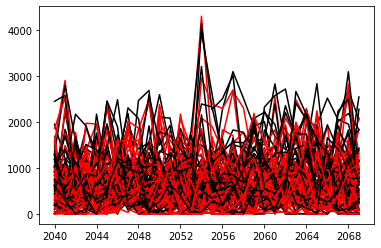

In [12]:
for proj in projections:
    plt.plot(DPS_7Q[proj]['P14'], color = 'red')
#     plt.plot(DPS_7Q[proj]['P47'], color = 'darkblue')
#     plt.plot(DPS_7Q[proj]['P13'], color = 'lightblue')
#     plt.plot(DPS_7Q[proj]['P41'], color = 'yellow')
    plt.plot(UC_7Q[proj], color='black')

In [57]:
p14_lowflows = []
p92_lowflows = []
p07_lowflows = []
p41_lowflows = []
uc_lowflows = []

for proj in projections:
    p14_lowflows.extend(DPS_7Q[proj]['P14'].tolist())
    p92_lowflows.extend(DPS_7Q[proj]['P92'].tolist())
    p07_lowflows.extend(DPS_7Q[proj]['P07'].tolist())
    p41_lowflows.extend(DPS_7Q[proj]['P41'].tolist())
    uc_lowflows.extend(UC_7Q[proj]['PUC'].tolist())

In [58]:
df_low = pd.DataFrame()
df_low['PUC'] = uc_lowflows
df_low = pd.concat([HUC_7qs['00'], df_low], ignore_index=True, axis=1)
df_low.columns = ['HUC', 'PUC']

In [59]:
df_low['7QS'] = p14_lowflows
df_low['Both'] = p41_lowflows
df_low['ENV'] = p07_lowflows
df_low['AMS'] = p92_lowflows

In [60]:
cmap = plt.cm.get_cmap('RdBu')

colors = ['lightgrey', 'darkgrey', cmap(0.25), cmap(0.45), cmap(0.75), cmap(1.0)]


In [61]:
my_pal = {"HUC": "lightgreen", "PUC": "forestgreen", "7QS":cmap(0.25), "Both":cmap(0.55), "ENV":cmap(0.75), "AMS": cmap(1.0)}

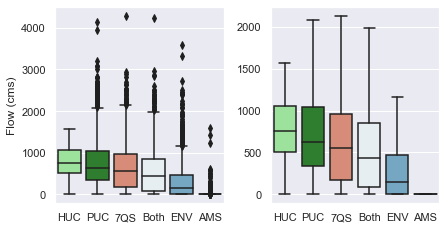

In [62]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(data=df_low, palette=my_pal, showfliers = True, ax=ax1)
sns.boxplot(data=df_low, palette=my_pal, showfliers = False, ax = ax2)
fig.set_size_inches([6.3625,3.3625])
ax1.set_ylabel('Flow (cms)')
fig.tight_layout()
plt.show()

In [63]:
df_low.min()

HUC     0.0
PUC     0.0
7QS     0.0
Both    0.0
ENV     0.0
AMS     0.0
dtype: float64

KeyError: "['AMS_ENV'] not in index"

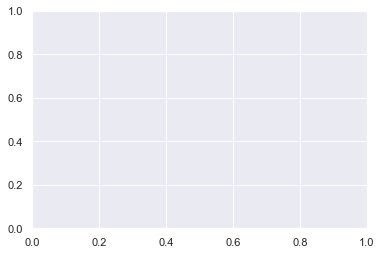

In [64]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(1,1)
ax = sns.violinplot(data=df_low[[ 'HUC', 'PUC', '7QS', 'AMS_ENV']], cut=0)
fig.set_size_inches([13, 6])
plt.title("Seven Day Low Flows")
plt.show()

In [94]:
DPS_AMS[proj]['P14']

date
2040-12-31    1015.0
2041-12-31     919.8
2042-12-31     932.4
2043-12-31     510.9
2044-12-31     655.6
2045-12-31    2460.0
2046-12-31    5655.0
2047-12-31    2055.0
2048-12-31     915.2
2049-12-31     994.5
2050-12-31     967.6
2051-12-31    1837.0
2052-12-31     823.9
2053-12-31     536.3
2054-12-31     550.2
2055-12-31    1143.0
2056-12-31    1169.0
2057-12-31     995.1
2058-12-31    5101.0
2059-12-31    1817.0
2060-12-31    1160.0
2061-12-31    2456.0
2062-12-31    3277.0
2063-12-31    5216.0
2064-12-31    1748.0
2065-12-31    1122.0
2066-12-31    1224.0
2067-12-31    1344.0
2068-12-31    1824.0
2069-12-31    2759.0
Name: P14, dtype: float64

In [65]:
DPS_AMS = dict.fromkeys(projections)
UC_AMS = dict.fromkeys(projections)

for proj in projections:
    DPS_AMS[proj] = pd.read_csv(os.path.join(fpath_d,'%s_AMS.csv' % proj), parse_dates=True, index_col = 'date')
    UC_AMS[proj] = pd.read_csv(os.path.join(fpath_u,'%s_AMS.csv' % proj), parse_dates=True, index_col = 'date')
    
for proj in projections:
    DPS_AMS[proj] = DPS_AMS[proj][(DPS_AMS[proj].index.year >= 2040) & (DPS_AMS[proj].index.year <= 2069)]
    UC_AMS[proj] = UC_AMS[proj][(UC_AMS[proj].index.year >= 2040) & (UC_AMS[proj].index.year <= 2069)]

In [66]:
p14_highflows = []
p92_highflows = []
p07_highflows = []
p41_highflows = []
uc_highflows = []

for proj in projections:
    p14_highflows.extend(DPS_AMS[proj]['P14'].tolist())
    p92_highflows.extend(DPS_AMS[proj]['P92'].tolist())
    p07_highflows.extend(DPS_AMS[proj]['P07'].tolist())
    p41_highflows.extend(DPS_AMS[proj]['P41'].tolist())
    uc_highflows.extend(UC_AMS[proj]['PUC'].tolist())

In [67]:
df_hi = pd.DataFrame()
df_hi['PUC'] = uc_highflows
df_hi = pd.concat([HUC_ams['00'], df_hi], ignore_index=True, axis=1)
df_hi.columns = ['HUC', 'PUC']

In [68]:
df_hi['7QS'] = p14_highflows
df_hi['Both'] = p41_highflows
df_hi['ENV'] = p07_highflows
df_hi['AMS'] = p92_highflows


In [88]:
df_low = df_low + 0.1

In [89]:
df_low_log = np.log10(df_low)

In [93]:
df_low_log['AMS'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1435    False
1436    False
1437    False
1438    False
1439    False
Name: AMS, Length: 1440, dtype: bool

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


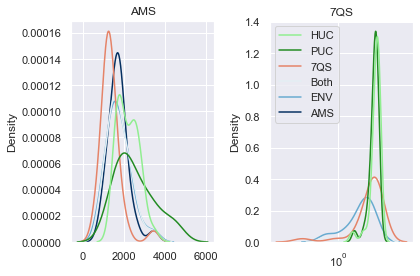

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2)
# sns.kdeplot(data=df_hi[df_hi.columns[1:]], palette=my_pal, ax=ax1, log_scale=True, legend = False)
sns.kdeplot(data=df_hi.dropna(), palette=my_pal, ax=ax1, log_scale=False, legend = False)
sns.kdeplot(data=df_low_log.dropna(), palette=my_pal, ax=ax2, log_scale=True)
# sns.kdeplot(data=df_low['AMS'], palette=my_pal, ax=ax2, log_scale=True)

# sns.kdeplot(data=df_low['AMS'], palette=my_pal, ax=ax2, log_scale=True)

ax1.set_title("AMS")
ax2.set_title("7QS")
fig.tight_layout()
plt.savefig('../Figures/KDE.png')

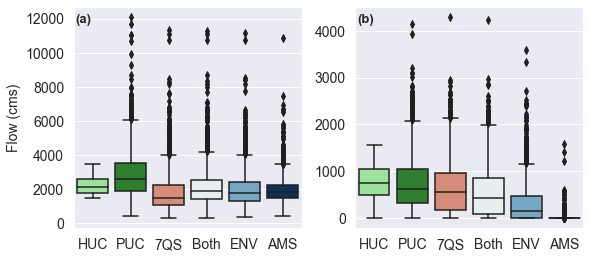

In [97]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(data=df_hi, palette=my_pal, showfliers = True, ax=ax1)
sns.boxplot(data=df_low, palette=my_pal, showfliers = True, ax = ax2)
fig.set_size_inches([8.3625,3.7625])
ax1.set_ylabel('Flow (cms)', fontsize=14)

ax1.tick_params(axis='x', labelsize= 14)


ax_ls = [ax1, ax2]
for i in range(len(ax_ls)):
    ax_ls[i].text(0.008, 0.93, "("+ string.ascii_lowercase[i] + ")", transform=ax_ls[i].transAxes, 
            size=13, weight='bold')
    ax_ls[i].tick_params(axis='x', labelsize= 14)
    ax_ls[i].tick_params(axis='y', labelsize= 14)


fig.tight_layout()
fig.savefig('../Figures/Boxplots.png')
plt.show()

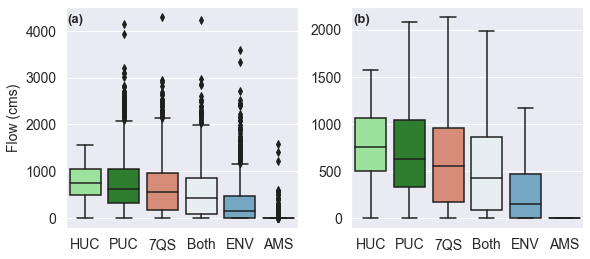

In [26]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(data=df_low, palette=my_pal, showfliers = True, ax=ax1)
sns.boxplot(data=df_low, palette=my_pal, showfliers = False, ax = ax2)
fig.set_size_inches([8.3625,3.7625])
ax1.set_ylabel('Flow (cms)', fontsize=14)

ax1.tick_params(axis='x', labelsize= 14)


ax_ls = [ax1, ax2]
for i in range(len(ax_ls)):
    ax_ls[i].text(0.008, 0.93, "("+ string.ascii_lowercase[i] + ")", transform=ax_ls[i].transAxes, 
            size=13, weight='bold')
    ax_ls[i].tick_params(axis='x', labelsize= 14)
    ax_ls[i].tick_params(axis='y', labelsize= 14)


fig.tight_layout()
fig.savefig('../Figures/7QS_Boxplots.png')
plt.show()

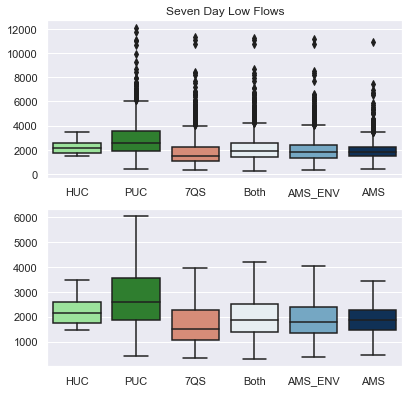

In [103]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches([6.3625,6.3625])
sns.boxplot(data=df_hi, palette=my_pal, showfliers = True, ax=ax1)
ax1.set_title("Seven Day Low Flows")
sns.boxplot(data=df_hi, palette=my_pal, showfliers = False, ax = ax2)
plt.show()

<AxesSubplot:>

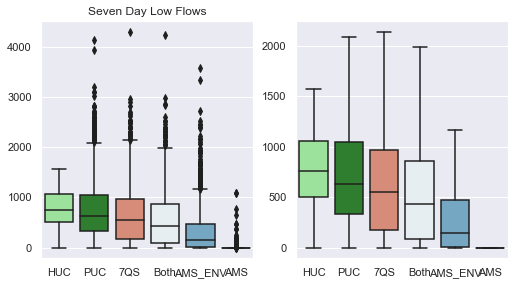

In [114]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches([8.3625,4.3625])
sns.boxplot(data=df_low, palette=my_pal, showfliers = True, ax=ax1)
ax1.set_title("Seven Day Low Flows")
sns.boxplot(data=df_low, palette=my_pal, showfliers = False, ax=ax2)

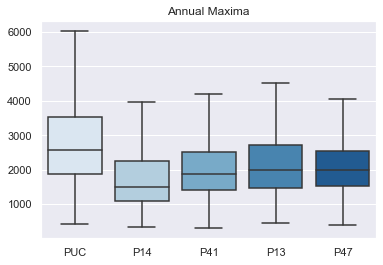

In [63]:
my_pal = {"PUC": "darkgrey", "P14": "orange", "P47":"dogerblue", "P13":"powderblue", 
         "P41":"yellow"}
sns.set(style="darkgrid")
sns.boxplot(data=df, palette="Blues", showfliers = False)
plt.title("Annual Maxima")
plt.show()

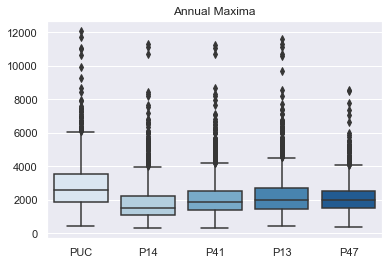

In [66]:
my_pal = {"PUC": "darkgrey", "P14": "orange", "P47":"dogerblue", "P13":"powderblue", 
         "P41":"yellow"}
sns.set(style="darkgrid")
sns.boxplot(data=df, palette="Blues", showfliers = True)
plt.title("Annual Maxima")
plt.show()